<a href="https://colab.research.google.com/github/ganeshagrahari/Pytorch-Framework/blob/main/Vanishing_Gradient_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stopping and Regulization


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender',], inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
#Diving in to features and labels
x = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#Scaling
ss = StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns = x.columns)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [ ]:
#creating An ANN
import tensorflow

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2

In [ ]:
ann  = Sequential()

In [ ]:
x.shape

(10000, 8)

In [ ]:
ann.add(Dense(6,input_dim = 8,activation ="relu",kernel_regularizer=l2(0.01))) # regulization technique
ann.add(Dense(4,activation ="relu",kernel_regularizer=l2(0.01)))
ann.add(Dense(2,activation ="relu",kernel_regularizer=l2(0.01)))
ann.add(Dense(1,activation ="sigmoid")) # in the last layer we are changing the af cuz now there is no hidden layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer = "adam", loss ="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
ann.fit(x_train,y_train,batch_size=100,epochs= 10,validation_data=(x_test,y_test),callbacks= EarlyStopping()) #Earlystopping
# in this we haven't vanishing gradient problem as we can see losses are continuely decreaseing ....

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7946 - loss: 0.7834 - val_accuracy: 0.7890 - val_loss: 0.7453
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.7332 - val_accuracy: 0.7890 - val_loss: 0.7045
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7973 - loss: 0.6944 - val_accuracy: 0.7890 - val_loss: 0.6718
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.6623 - val_accuracy: 0.7890 - val_loss: 0.6449
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7961 - loss: 0.6369 - val_accuracy: 0.7890 - val_loss: 0.6229
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8019 - loss: 0.6132 - val_accuracy: 0.7890 - val_loss: 0.6047
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7991 - loss: 0.5963 - val_accuracy: 0.7890 - val_loss: 0.5896
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.5803 - val_accuracy: 0.7890 - val_loss:

In [ ]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]

In [ ]:
len(test_accuracy)

10

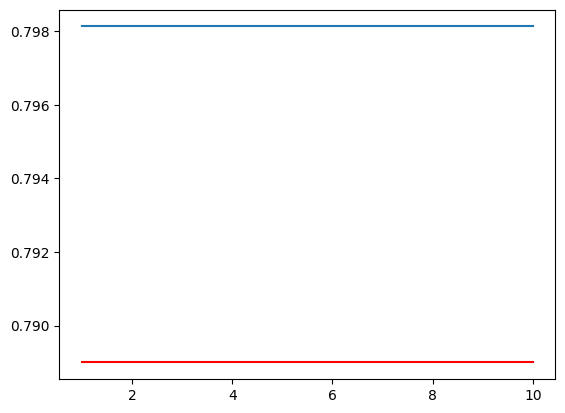

In [ ]:
plt.plot([i for i in range(1,11)],train_accuracy)
plt.plot([i for i  in range(1,11)],test_accuracy,color ="red")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#for checking the accuracy on test data
prdtest=ann.predict(x_test)
prdtest_data = []
for i in prdtest:
  if(i[0]>0.5):
    prdtest_data.append(1)
  else:
      prdtest_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
#for checking the accuracy on train data
prdtrain=ann.predict(x_train)
prdtrain_data = []
for i in prdtrain:
  if(i[0]>0.5):
    prdtrain_data.append(1)
  else:
      prdtrain_data.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
accuracy_score(y_test,prdtest_data) #1-> actual_value 2-> predicted_value --- for test dataset

0.789

In [ ]:
accuracy_score(y_train,prdtrain_data) #1-> actual_value 2-> predicted_value --- for test train data set

0.798125